# Climate change Prediction Analysis using Machine Learning Techniques


### Importing Data and necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
file_path=('/content/drive/MyDrive/IndianWeatherRepository.csv')
weather_data = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
weather_data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,84899.000000,84899.000000,8.489900e+04,84899.000000,84899.000000,84899.000000,84899.000000,84899.000000,84899.000000,84899.000000,...,84899.000000,84899.000000,84899.000000,84899.000000,84899.000000,84899.000000,84899.000000,84899.000000,84899.000000,84899.000000
mean,23.097287,80.242388,1.700135e+09,19.652492,67.374679,4.681505,7.539571,151.655520,1012.499653,29.898706,...,14.438889,814.169107,35.335876,14.763923,5.785869,102.470897,119.214319,3.384068,6.888703,52.519017
std,5.792959,5.759423,4.045886e+06,6.091889,10.965135,2.616567,4.202460,114.135306,5.082023,0.149965,...,7.281140,678.811652,26.322356,15.315312,11.973729,103.966464,116.844444,1.497293,3.582395,34.974755
min,7.170000,68.970000,1.693286e+09,-20.700000,-5.200000,2.200000,3.600000,1.000000,991.000000,29.280000,...,0.000000,113.500000,0.000000,0.000000,0.000000,0.500000,0.600000,1.000000,1.000000,0.000000
25%,20.270000,76.070000,1.696541e+09,16.000000,60.800000,2.500000,4.000000,52.000000,1009.000000,29.800000,...,9.100000,427.300000,14.800000,5.200000,1.400000,29.900000,38.000000,2.000000,3.000000,18.000000
50%,23.950000,78.690000,1.700251e+09,20.800000,69.400000,4.000000,6.500000,112.000000,1013.000000,29.930000,...,13.400000,607.500000,30.800000,10.400000,3.000000,69.900000,85.000000,4.000000,9.000000,53.000000
75%,26.770000,83.900000,1.703702e+09,24.000000,75.200000,5.800000,9.400000,265.000000,1016.000000,30.000000,...,18.700000,988.000000,51.500000,19.500000,6.000000,137.900000,159.200000,4.000000,10.000000,88.000000
max,34.570000,95.800000,1.706983e+09,38.300000,100.900000,26.800000,43.200000,360.000000,1042.000000,30.780000,...,82.200000,13565.100000,234.600000,274.200000,541.700000,1374.800000,1537.800000,6.000000,10.000000,100.000000


# Data preprocessing


In [ ]:
weather_df= weather_data.select_dtypes(include = 'number')
cols = weather_df.columns.values
cols

array(['latitude', 'longitude', 'last_updated_epoch',
       'temperature_celsius', 'temperature_fahrenheit', 'wind_mph',
       'wind_kph', 'wind_degree', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud',
       'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index',
       'moon_illumination'], dtype=object)

In [ ]:
weather_df.drop(['temperature_fahrenheit','wind_mph','pressure_in','precip_mm','feels_like_fahrenheit','visibility_km','gust_mph'], axis=1,inplace=True)
weather_df.columns

Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'wind_kph', 'wind_degree', 'pressure_mb', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_miles', 'uv_index',
       'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')

# Understanding the data using histogram

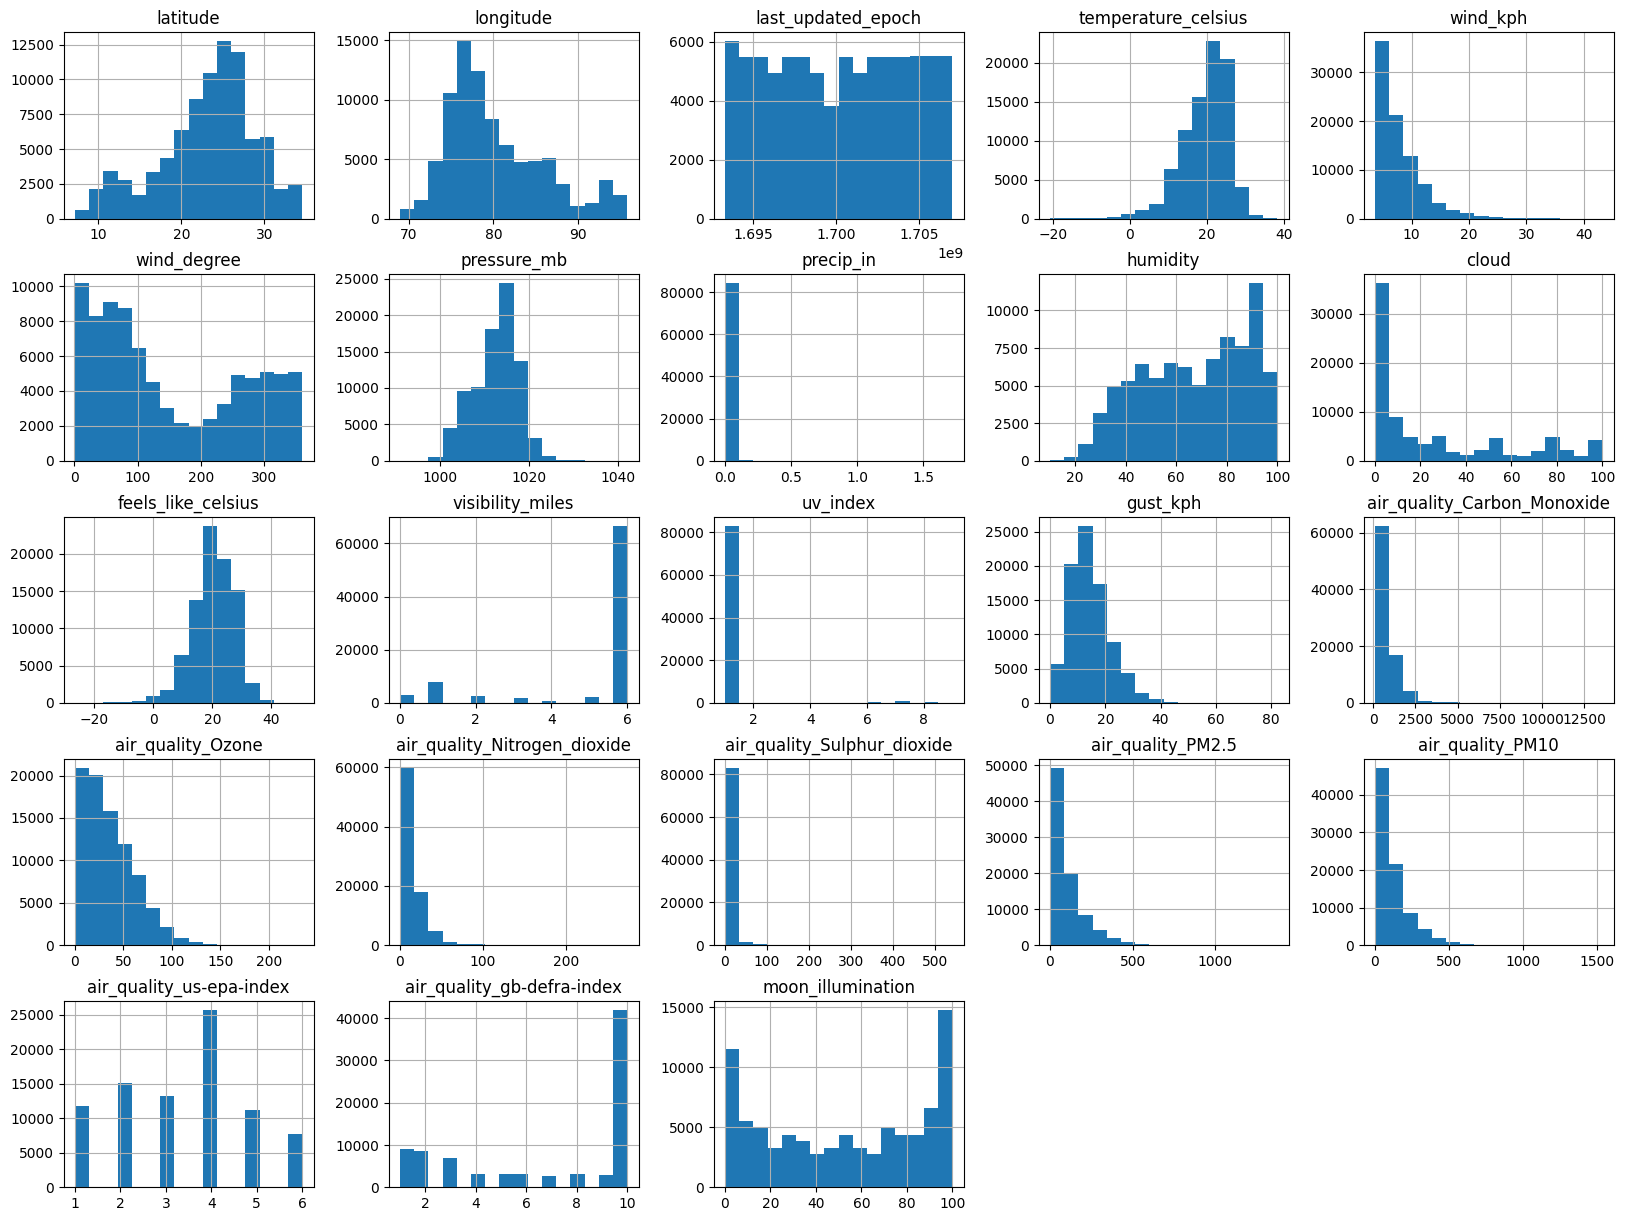

In [ ]:
weather_df.hist(bins=16, figsize=(20,15));

# Determining correlation between various fields

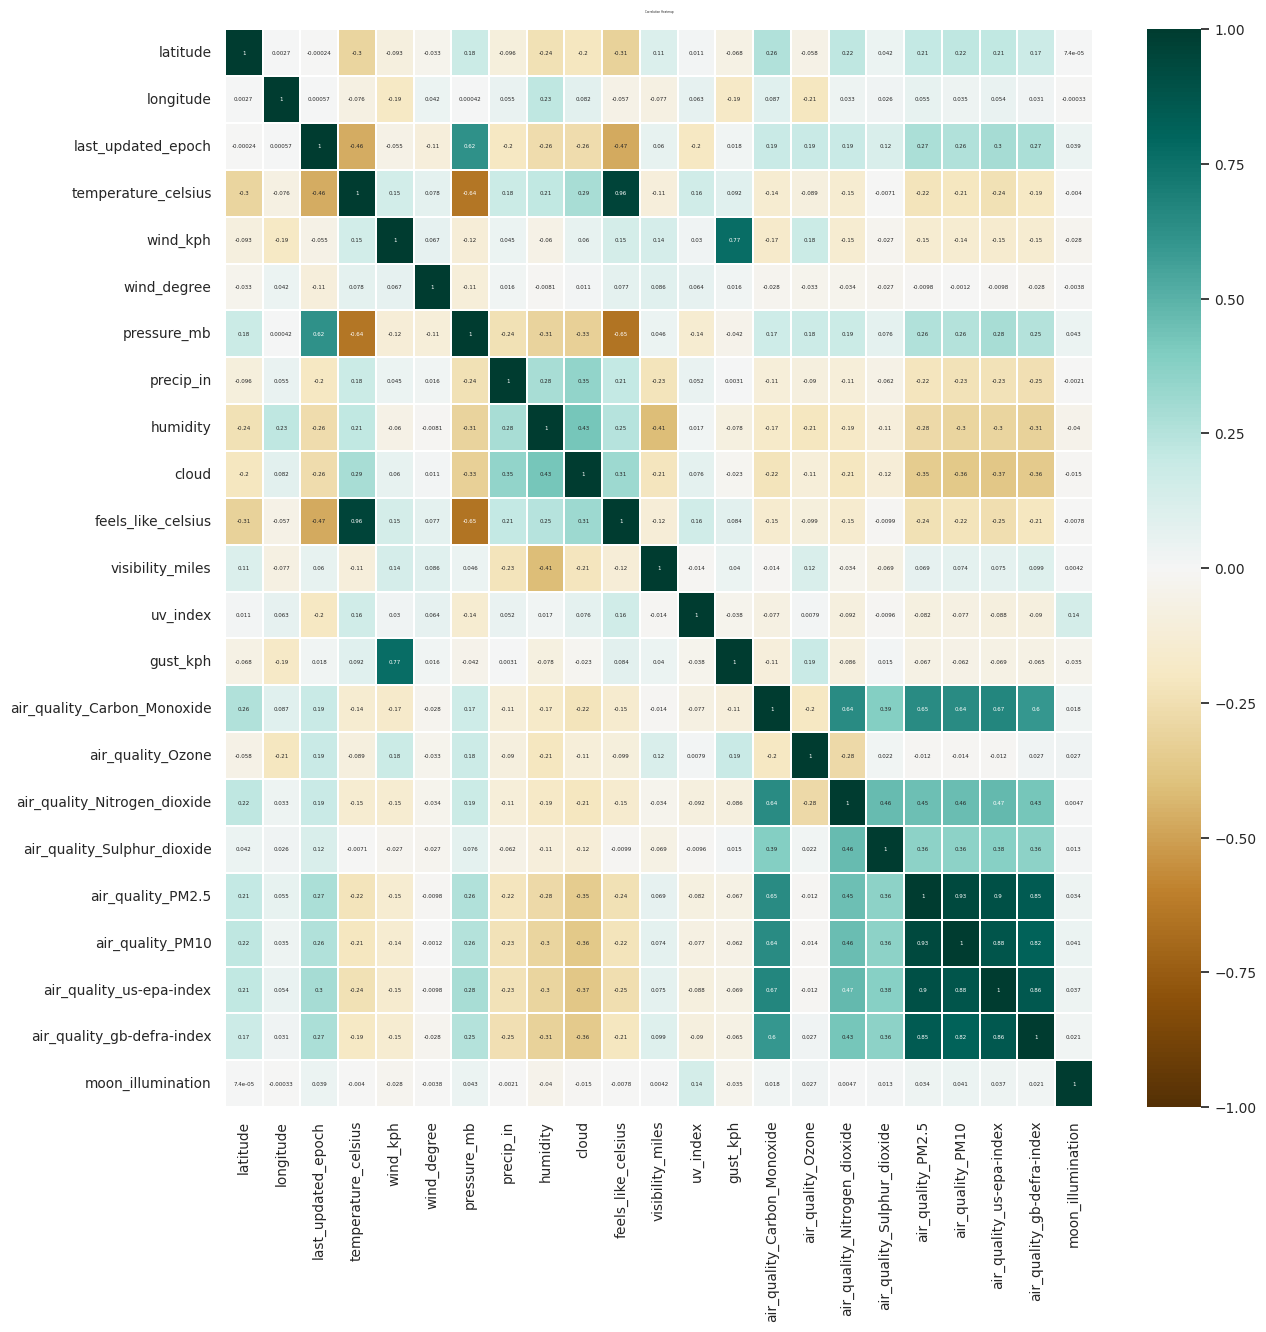

In [ ]:
sns.set(font_scale=0.9)

corr_matrix = weather_df.corr(method="kendall")

plt.figure(figsize=(14, 14))
heatmap= sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True,cmap='BrBG',annot_kws={"fontsize":4},linewidths=0.1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':2}, pad=12);


In [ ]:
sorted_corr_mat = corr_matrix.abs().unstack().sort_values()
sorted_corr_mat = sorted_corr_mat.to_frame(name="Correlation")

sorted_corr_mat=sorted_corr_mat.drop(sorted_corr_mat[sorted_corr_mat['Correlation']>0.95].index)
sorted_corr_mat=sorted_corr_mat.drop(sorted_corr_mat[sorted_corr_mat['Correlation']<0.05].index)
print("Fields with max correlation are:\n")

sorted_corr_mat[sorted_corr_mat['Correlation']>0.80]

Fields with max correlation are:



Correlation
air_quality_PM10           air_quality_gb-defra-index     0.819331
air_quality_gb-defra-index air_quality_PM10               0.819331
air_quality_PM2.5          air_quality_gb-defra-index     0.848404
air_quality_gb-defra-index air_quality_PM2.5              0.848404
air_quality_us-epa-index   air_quality_gb-defra-index     0.861902
air_quality_gb-defra-index air_quality_us-epa-index       0.861902
air_quality_PM10           air_quality_us-epa-index       0.882415
air_quality_us-epa-index   air_quality_PM10               0.882415
                           air_quality_PM2.5              0.898479
air_quality_PM2.5          air_quality_us-epa-index       0.898479
                           air_quality_PM10               0.933311
air_quality_PM10           air_quality_PM2.5              0.933311

# Understanding State-wise trend of air quality indices

In [ ]:
import plotly.express as px

In [ ]:
fig1=px.bar(weather_data.groupby('region')['air_quality_PM2.5'].mean().reset_index(),
           x='region', y='air_quality_PM2.5',
           title='Average PM2.5 by State')
fig1.show()

In [ ]:
fig2=px.bar(weather_data.groupby('region')['uv_index'].mean().reset_index(), x='region', y='uv_index', title='Average uv_index exposure by State')
fig2.show()

In [ ]:
fig3 = px.scatter(weather_data, x='uv_index', y='temperature_celsius', color='region',
                 title='Correlation Between UV Index and Temperature by Region',
                 labels={'uv_index': 'UV Index', 'temperature_celsius': 'Temperature (Celsius)'})

fig3.update_layout(xaxis_title='UV Index', yaxis_title='Temperature (Celsius)')

fig3.show()

In [ ]:
fig4=px.bar(weather_data.groupby('region')['temperature_celsius'].mean().reset_index(), x='region', y='temperature_celsius', title='Average temperature exposure by State')
fig4.show()

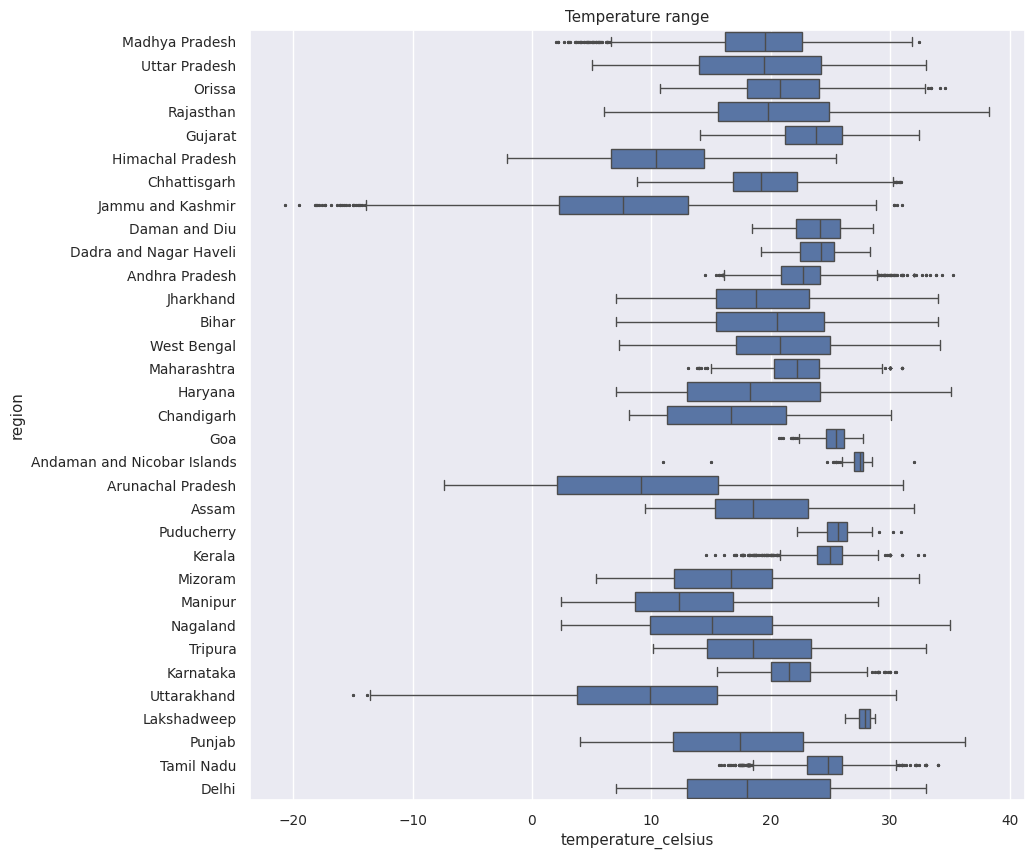

In [ ]:
plt.figure(figsize=(10, 10))
temp_range=sns.boxplot(data=weather_data, y='region', x='temperature_celsius',
                       flierprops={'marker': '*', 'markersize': 2, 'markerfacecolor': 'blue'})
temp_range.set_title("Temperature range")

plt.show()

# Ploting Temperature vs various air quality metrices (Scaled)

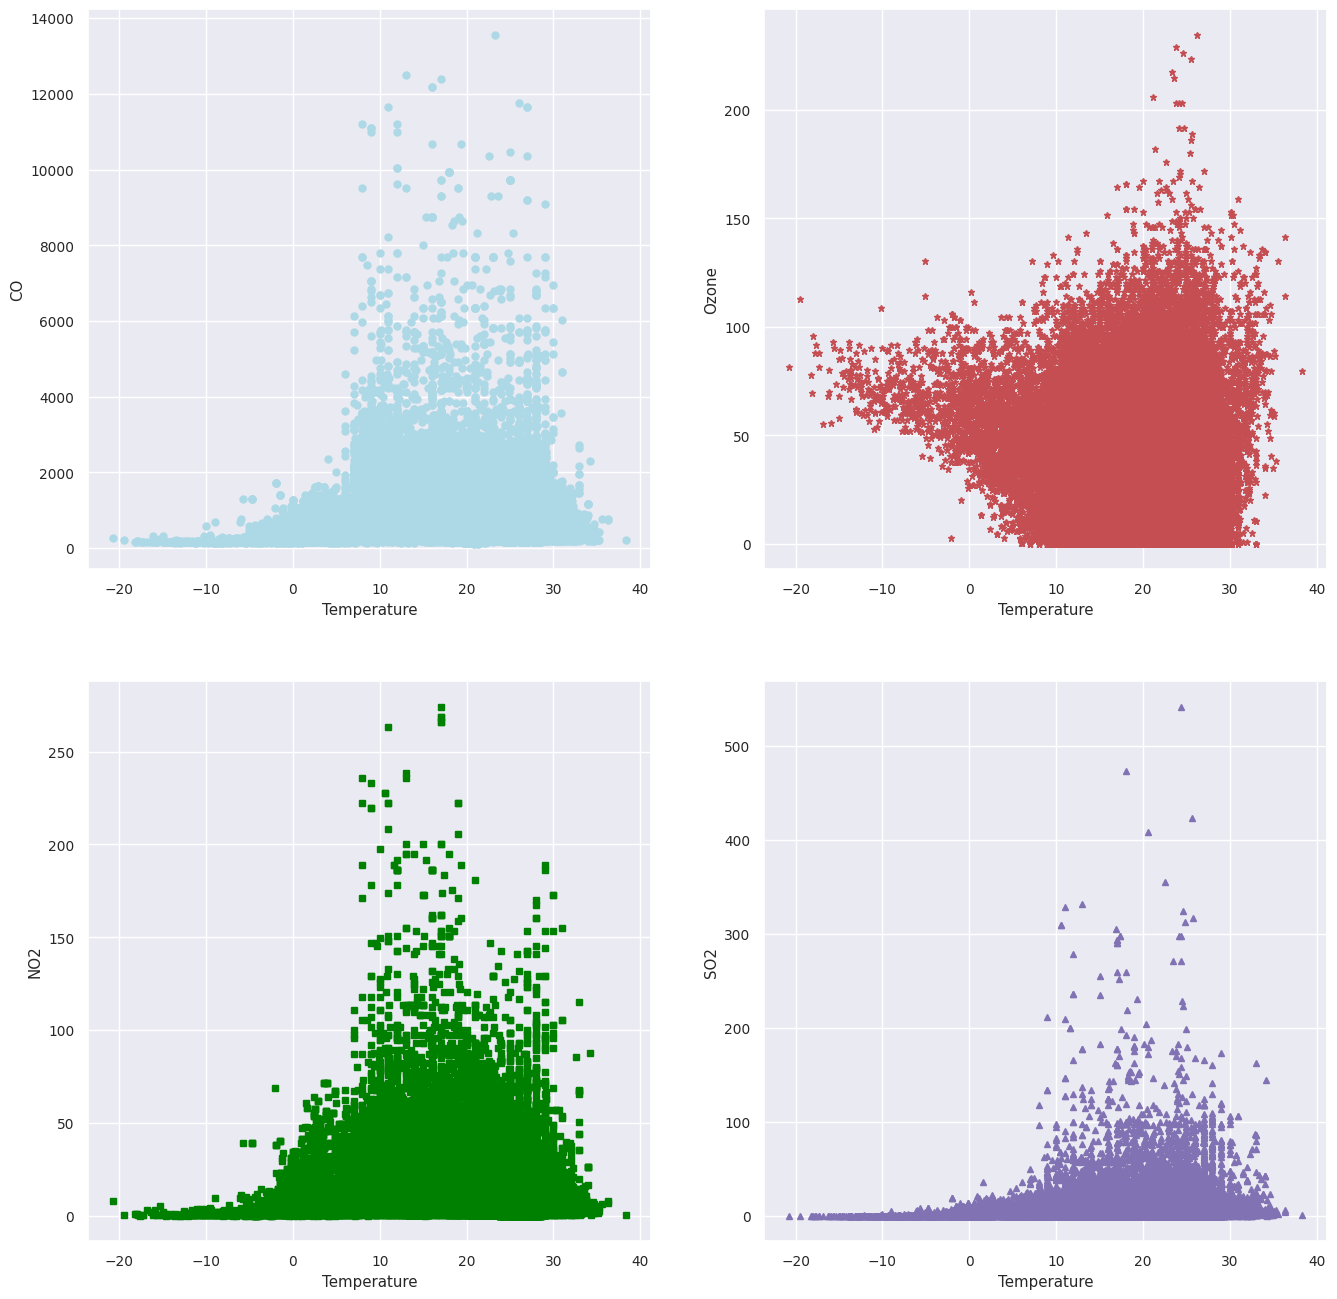

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

temp_weather=weather_data

air_quality_metrics = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
                       'air_quality_Sulphur_dioxide']

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.plot( "temperature_celsius","air_quality_Carbon_Monoxide", data=temp_weather,color="lightblue",marker='o',ms="5",ls = '',label="CO")
plt.xlabel("Temperature")
plt.ylabel("CO")

plt.subplot(2, 2, 2)
plt.plot( "temperature_celsius","air_quality_Ozone", data=temp_weather,color="r",marker='*',ms="5",ls = '',label="Ozone")
plt.xlabel("Temperature")
plt.ylabel("Ozone")

plt.subplot(2, 2, 3)
plt.plot( "temperature_celsius","air_quality_Nitrogen_dioxide", data=temp_weather,color="green",marker='s',ms="5",ls = '',label="NO2")
plt.xlabel("Temperature")
plt.ylabel("NO2")

plt.subplot(2, 2, 4)
plt.plot( "temperature_celsius","air_quality_Sulphur_dioxide", data=temp_weather,color="m",marker='^',ms="5",ls = '',label="SO2")
plt.xlabel("Temperature")
plt.ylabel("SO2")

plt.show()

In [ ]:
weather_df.columns

Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'wind_kph', 'wind_degree', 'pressure_mb', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_miles', 'uv_index',
       'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')

# Comparing various models that can be used to predict temperature


As temperature depend on various factors like latitude, longitude, wind, rain, humidity etc, we will be considering these fields only.

In [ ]:
temperature_data = weather_df['temperature_celsius']
temperature_factors = weather_df[['latitude','longitude','wind_kph','wind_degree','pressure_mb','precip_in','humidity','cloud']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(temperature_factors, temperature_data, test_size = 0.3, random_state = 0)

In [ ]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (59429, 8)
X_test: (25470, 8)
Y_train: (59429,)
Y_test: (25470,)


# Model 1 : Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge = Ridge()

ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)

model_accuracy = r2_score(y_test, y_pred) * 100
print('Accuracy of the model: %.2f' % model_accuracy)


Accuracy of the model: 72.59


# Model 2 : MultiLinear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(x_train,y_train)

y_pred=linreg.predict(x_test)

model_accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 72.59



# Model 3 : LASSO Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train, y_train)

y_pred=lasso.predict(x_test)

model_accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 72.03


# Model 4: Decision Tree Based Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)

model_accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 88.55


# Model 5: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)

regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

model_accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 94.04


# Model 6: SGD (Stochastic Gradient Descent)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_booster = GradientBoostingRegressor(
    n_estimators=500,learning_rate=0.1,random_state=100,
    max_features=5,loss='squared_error',)
gradient_booster.fit(x_train, y_train)

y_pred=gradient_booster.predict(x_test)

model_accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %model_accuracy)

 Accuracy of the model is 89.48


# Model 7: XGBoost Algorithm

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb = XGBRegressor()

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

model_accuracy = r2_score(y_test, y_pred) * 100
print('Accuracy of the model: %.2f' % model_accuracy)


Accuracy of the model: 91.96


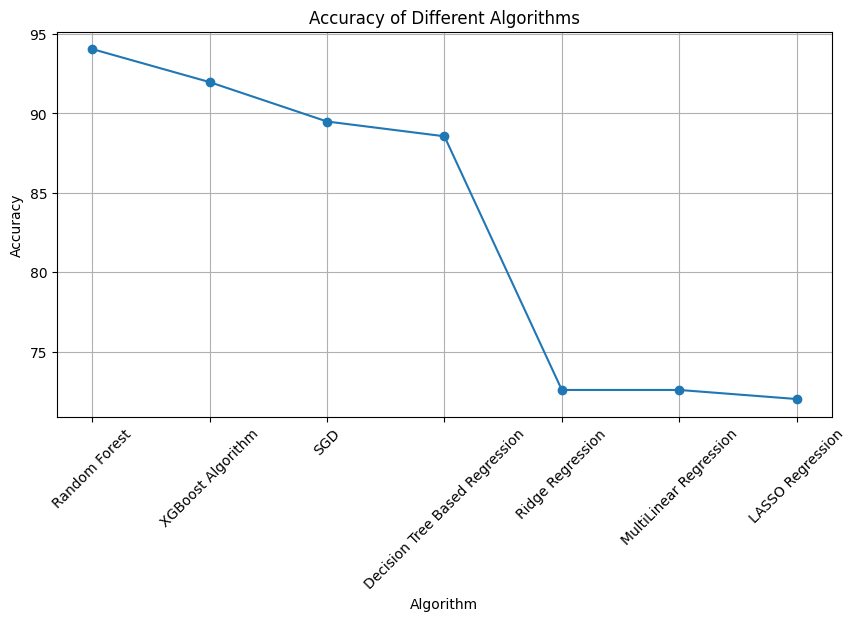

In [ ]:
import matplotlib.pyplot as plt

accuracy = {
    'Random Forest': 94.04,
    'XGBoost Algorithm': 91.96,
    'SGD': 89.48,
    'Decision Tree Based Regression': 88.55,
    'Ridge Regression': 72.59,
    'MultiLinear Regression': 72.59,
    'LASSO Regression': 72.02
}

plt.figure(figsize=(10, 5))
plt.plot(list(accuracy.keys()), list(accuracy.values()), marker='o')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Comparison - Random Forest > XGBoost Algorithm > SGD > Decision Tree Based Regression > Ridge Regression = MultiLinear Regression > LASSO Regression

# Conclusion - Random Forest has highest accuracy than other algorithms.